In [6]:
import matplotlib.pyplot as plt

In [2]:
from IPython.display import IFrame

In [3]:
final_string = ""
for img in input("paste files ").split(" "):
    # if "pdf" in img:
    #     final_string += f'IFrame("{img}", width = "1152px", height = "580px")\n\n'
    # else:
    final_string += f'<img src="./images/{img}" alt= “” width="1000px">\n\n'
print(final_string)

paste files dd
<img src="./images/dd" alt= “” width="1000px">




# Masters Thesis Colloquium
Proxy Attention : Approximating Attention in CNNs using Gradient Based Techniques


Subhaditya Mukherjee

Supervisors: S.H. Mohades Kasaei and Matias Valdenegro

# Introduction

## Image Classification

<img src="./images/cmuff.jpg" alt= “” width="1000px">

<img src="./images/class2.png" alt= “” width="1000px">
<!---
lung cancer
-->

<img src="./images/class3.jpg" alt= “” width="1000px">

<img src="./images/class4.png" alt= “” width="1000px">

## How?
<img src="./images/nn.gif" alt= “” width="500px">

## Quantifying Performance

### Accuracy
<img src="./images/chall1.jpg" alt= “” width="500px">

### Explainability
<img src="./images/challcam.jpg" alt= “” width="1000px">

## Challenges

### Parameters
<img src="./images/params.png" alt= “” width="1000px">

### Dataset sizes
<img src="./images/dssize.png" alt= “” width="1000px">

## Consequences 
- More labelled data
- Vastly more energy consumption
- Funds

## Objective
- Create a method to improve accuracy and explanations for image classification
- No extra labels, reduced compute time, no modification to the architecture

# Previous Work

## Augmentation

<img src="./images/aug.png" alt= “” width="1000px">

<img src="./images/data_aug_categories.png" alt= “” width="1000px">

## Gradient Based Explanations
<img src="./images/cams.png" alt= “” width="1000px">

## Limitations of Previous Work
- Most of the algorithms are used as a final post-processing 
- Contextual awareness
- Combining the fields of XAI and data augmentation to improve network performance is a rare practice.

# Proxy Attention

## Research Questions
1. Is it possible to create an augmentation technique that uses Attention maps?
2. Is it possible to approximate the effects of Attention from ViTs in a CNN without changing the architecture?
3. Is it possible to make a network converge faster and consequently require fewer data using the outputs from XAI techniques?
4. Does using Proxy Attention impact the explainability positively?

## Intuition
![img](./images/clutter.png)

![img](./images/attention.gif)

![img](./images/vitarch.png)

- insert gradcam example

- insert pipeline image

## Equations

Let $I_{s} \in \mathbb{R}^{W \times H \times C}$ be a random source image.

$resize(grad\_algorithm(I_{s}), size(I_{s}) = M \in \mathbb{R}^{W \times H}$

$I_{si} = inverse\_normalize(I_{s})$.

Now,

$$I_{o} = proxy(I_{si}, \lambda, \tau)=\begin{cases}
        (1- \lambda \odot M) \odot I_{si}, & \text{if $I_{si}> \tau$}.\\
        I_{si}, & \text{otherwise}.
    \end{cases}$$
    
$I_{o} \in \mathbb{R}^{W \times H \times C}$ is the final proxy image.

# Extensive Testing

## Datasets

### CIFAR100
<img src="./images/cifar100.pdf.png" alt= “” width="1000px">

### Caltech101
<img src="./images/caltech101.pdf.png" alt= “” width="1000px">

### Places
<img src="./images/places256.pdf.png" alt= “” width="1000px">

### Stanford Dogs
<img src="./images/dogs.pdf.png" alt= “” width="1000px">

### Tsinghua Dogs
<img src="./images/tsing.png" alt= “” width="1000px">

## Architectures

### VGG
<img src="./images/vggarch.png" alt= “” width="500px">

### ResNet
<img src="./images/resnetarch.png" alt= “” width="1000px">

### EfficientNet
<img src="./images/effnetarch.png" alt= “” width="1000px">

### Vision Transformer
<img src="./images/vitarch.png" alt= “” width="1000px">

## Proxy Image Threshold
<img src="./images/grad_threshold-crop.pdf.png" alt= “” width="500px">

## Proxy Image Weight
<img src="./images/multiply_threshold-crop.pdf.png" alt= “” width="500px">

## Pixel Replacement Types
<img src="./images/replacementtypes.pdf.png" alt= “” width="700px">

## Proxy Step Schedule
- [20, p,19]
- [5, p, 9, p,9, p,4]

## Subset of Wrongly Classified Images
- 0.1
- 0.2
- 0.4
- 0.8
- 0.95

## Training Assumptions
- Equal number of epochs
- Every other parameter fixed
- Equal number of data points for the DataLoaders

# Results

In [140]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def tex_to_figs(txt):
    figs = []
    temp_fig = {}
    fig_cnt = 0
    cm_cnt = 0
    all_files = []
    for line in txt.split("\n"):
        if fig_cnt == 100 or "endfig" in line:
            figs.append(temp_fig)
            temp_fig = {}
            fig_cnt = 0
            cm_cnt = 0
        if "includegraphics" in line:
            fle = "./images/"+ line.split("/")[-1].replace("}", "").replace(".pdf", ".pdf.jpg").replace("{", "").strip()
            fle_n = line.split("/")[-1].replace("}", "").replace("{", "").strip()
            all_files.append(fle_n)
            fig_cnt += 1

            temp_fig[f"file_{fig_cnt}"] = fle

        if "caption" in line:
            ln = line.replace("}", "").replace("\caption", "").replace("{", "").strip()

            if cm_cnt <= 2:
                temp_fig[f"caption_{cm_cnt}"] = ln
                cm_cnt += 1
            if cm_cnt == 3:
    #             temp_fig["fullcaption"] = ln
                fig_cnt = 100
    return figs

def generate_plots_2(im1, cap1, im2, cap2, fullcap):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Load and display the first image in the left subplot
    img1 = mpimg.imread(im1)
    axes[0].imshow(img1)
    axes[0].set_title(cap1)
    axes[0].axis('off')

    # Load and display the second image in the right subplot
    img2 = mpimg.imread(im2)
    axes[1].imshow(img2)
    axes[1].set_title(cap2)
    axes[1].axis('off')

    # Set the layout and spacing
    plt.tight_layout()

    # Add a common title for tahe figure
    plt.suptitle(fullcap)

    # Display the figure

    plt.show()

def generate_plots_1(im1, cap1):
    img1 = mpimg.imread(im1)
    plt.imshow(img1)
    plt.title(cap1)
    plt.tight_layout()
    plt.axis('off')
    plt.show()
    
def plot_from_fig(n):
    fig = figs[n]
    try:
        fig["caption_2"]
        generate_plots_2(*fig.values())
    except KeyError:
        generate_plots_1(*fig.values())

## By Dataset

In [141]:
txt = r"""
\begin{subfigure}[h]{.5\textwidth}
  \includegraphics[width=\linewidth, right]{results/tsing_results.pdf}
  \caption{Tsinghua Dogs Dataset}
\end{subfigure}
% \hfill
\begin{subfigure}[h]{.5\textwidth}
  \includegraphics[width=\linewidth, left]{results/places256_results.pdf}
  \caption{Places256 Dataset}
\end{subfigure}
\caption{Comparing Accuracies of Models trained with and without Proxy Attention on the Tsinghua Dogs and Places256 datasets}

\begin{subfigure}[h]{.5\textwidth}
  \includegraphics[width=\linewidth, right]{results/dogs_results.pdf}
  \caption{Stanford Dogs Dataset}
\end{subfigure}
% \hfill
\begin{subfigure}[h]{.5\textwidth}
  \includegraphics[width=\linewidth, left]{results/cifar100_results.pdf}
  \caption{CIFAR100 Dataset}
\end{subfigure}
\caption{Comparing Accuracies of models trained with and without Proxy Attention on the Stanford Dogs and CIFAR100 datasets}


\begin{subfigure}[h]{.5\textwidth}
  \includegraphics[width=\linewidth, right]{results/caltech101_results.pdf}
  \caption{Caltech101 Dataset}
\end{subfigure}
% \hfill
\begin{subfigure}[h]{.5\textwidth}
  \includegraphics[width=\linewidth, left]{results/asl_results.pdf}
  \caption{Asl Dataset}
\end{subfigure}
\caption{Comparing Accuracies of models trained with and without Proxy Attention on the Caltech101 and Asl datasets}


\begin{figure}[!htb]
    \centering
    \includegraphics[width=.6\linewidth]{results/plantdisease_results.pdf}
    \caption{Comparing Accuracies of models trained with and without Proxy Attention on the Plant Disease dataset}
    \label{fig:plantdisease_results}
\end{figure}

endfig
"""

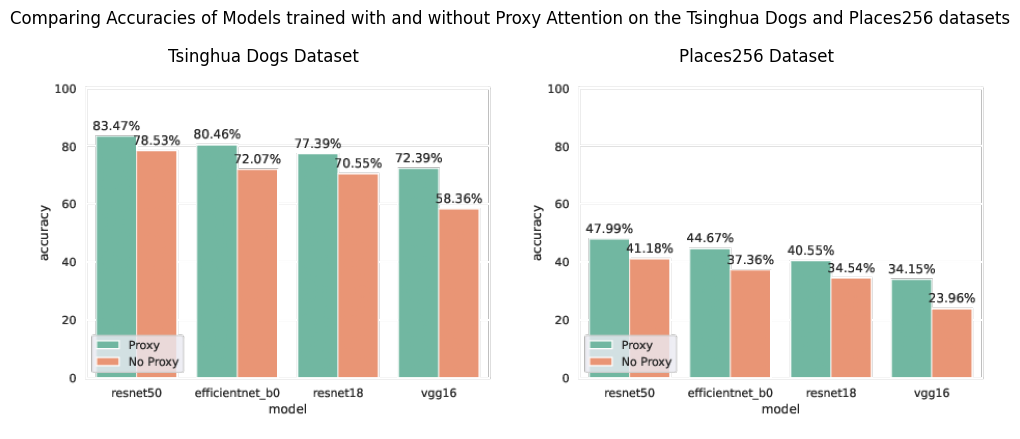

In [149]:
plot_from_fig(0)

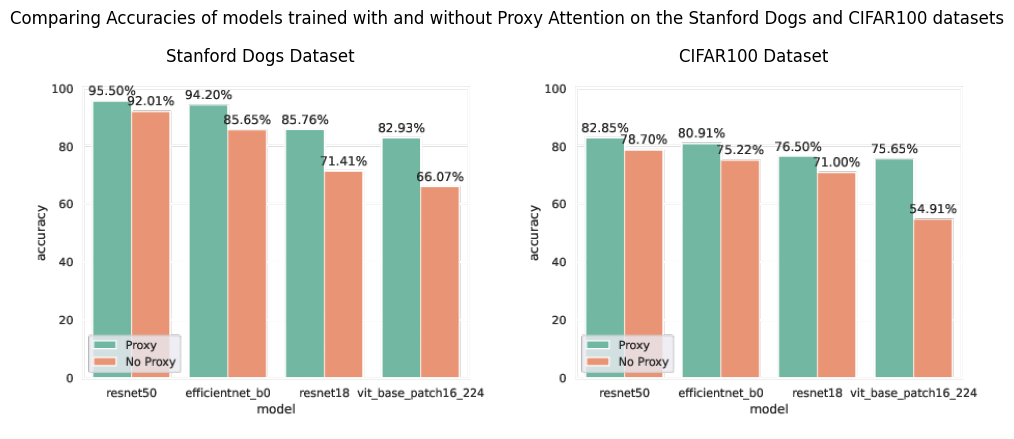

In [150]:
plot_from_fig(1)

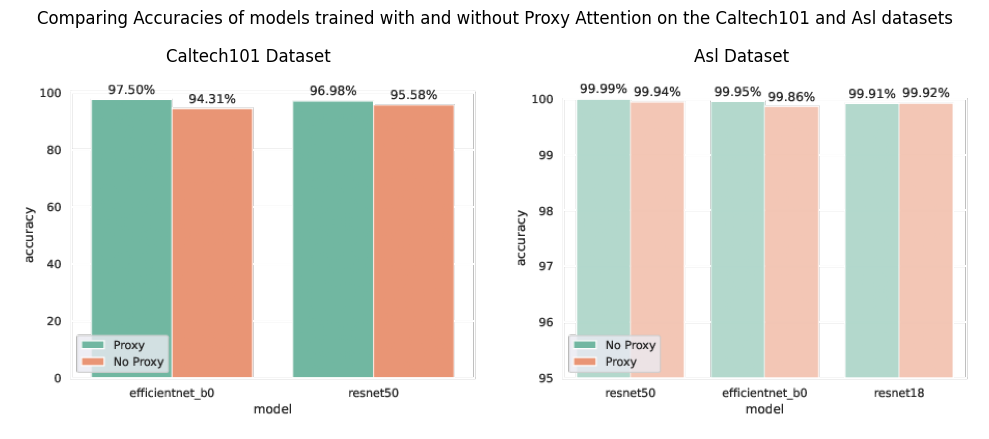

In [151]:
plot_from_fig(2)

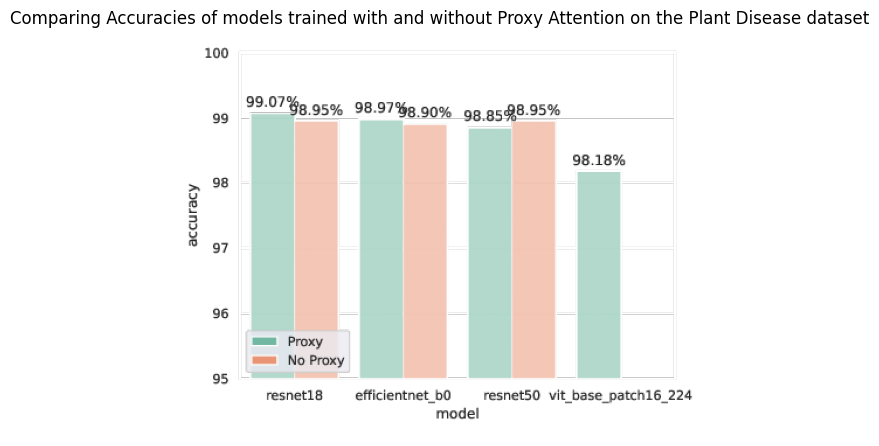

In [152]:
plot_from_fig(3)

# Discussion
- Improved performance
- Explainability
- When to apply Proxy Attention? : Easy vs Hard Datasets
- Optional hyperparameters : Proxy Weight and Proxy Threshold
- Scheduling the Proxy Step
- Performance across models

# Limitations

- Hyperparameters
- Attention
- Better Scheduling

# Future Work

- More Schedules
- More XAI methods
- Smoothing Attention Maps
- Better Attention Maps for ViT

# Q&A
<img src="./images/qs.jpg" alt= “” width="1000px">

# References
- https://lih-verma.medium.com/query-key-and-value-in-attention-mechanism-3c3c6a2d4085
- @dosovitskiyImageWorth16x162021
- https://epochai.org/blog/trends-in-training-dataset-sizes